<em><p style="font-size:24px">Linear Regression and Prediction with Car Data</p></em>

<u><p style="font-size:20px">1. Formulating the Goal of the Analysis</p></u>

This example focuses on data gathered from several second-hand car dealerships. The aim of the analysis is to create a linear regression model that uses the available features of second-hand cars to explain the dependent variable <b>Car Price</b> as well as possible. The model will be tested and used to predict the prices of 3 fictional cars that could theoretically be offered by your car dealer next door.

<u><p style="font-size:20px">2. Importing the Relevant Libraries</p></u>

First, we will import the relevant libraries which we need throughout the example. We will import further packages from Sklearn later on in the process, together with the tasks at hand, so it becomes clearer and more integrated in the work-flow.

<em>Additional info</em>: We will activate Seaborn's visuals to overwrite the standard matplotlib styles for plots.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
sns.set

<function seaborn.rcmod.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

<u><p style="font-size:20px">3. Importing the Data</p></u>

We will now import (or read) the data, which has been saved as a comma delimited .csv file:

In [2]:
raw_data = pd.read_csv("Car_Example.csv")

<u><p style="font-size:20px">4. Exploring the Data</p></u>

We can describe the data by looking at a first summary:

In [3]:
raw_data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


<u><p style="font-size:18px">4.1. Variable Clarification</p></u>

The dataset provides cases of second-hand cars that were offered at several car dealerships. Each car has a variety of features to describe it. Here a brief description:

<b>Brand</b>: The car brand. We have 7 unique brands in the dataset. The data is categorical.

<b>Price</b>: The price a car was offered for at the dealership (in dollars). It is the dependent variable in this analysis. The data is numerical.

<b>Body</b>: The car's body type. We have 6 unique body types. The data is categorical.

<b>Mileage</b>: The amount of miles the car was driven in its lifetime (in 1000s). The data is numerical.

<b>EngineV</b>: The car's engine volume in litres. The data is numerical.

<b>Engine Type</b>: The car's engine (or fuel) type. We have 4 unique engine types. The data is categorical.

<b>Registration</b>: Shows whether or not a car has a valid registration. The data is categorical and dichotomous.

<b>Year</b>: The year in which the car was manufactured. The data is numerical.

<b>Model</b>: The car model. We have 312 unique models. The data is categorical.

<u><p style="font-size:18px">4.2. Verifying Linear Relationships</p></u>

Perfoming a linear regression implies that the independent variables (or regressors) have a linear relationship with the dependent variable (or regressand). To test if this assumption is true, we can plot our numeric regressors <b>Mileage</b>, <b>Engine Volume</b> and <b>Year</b> against the <b>Price</b> variable, which should be our regressand.

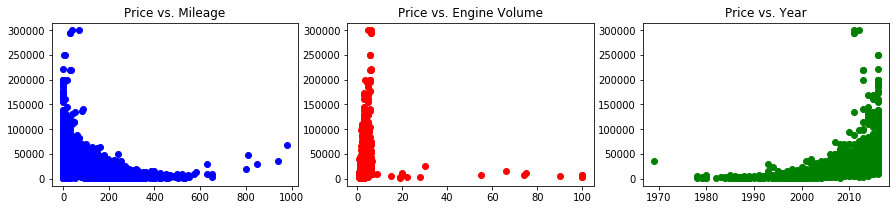

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize= (15,3))

ax1.scatter(raw_data['Mileage'], raw_data['Price'], c="blue")
ax1.set_title('Price vs. Mileage')

ax2.scatter(raw_data['EngineV'], raw_data['Price'], c="red")
ax2.set_title('Price vs. Engine Volume')

ax3.scatter(raw_data['Year'], raw_data['Price'], c="green")
ax3.set_title('Price vs. Year')

plt.show()

We can see that <b>Price</b> and <b>Mileage</b> as well as <b>Price</b> and <b>Year</b> have exponential relationships. The more miles a car was driven, the lower its price will be. Similarly, the later the manufacturing year of the car, the higher its price. Even though these relationships are not linear, we can transform them to be linear by taking the natural logarithm of the price variable, which we need to keep in mind for the rest of the analysis.

The relationship between <b>Price</b> and <b>Engine Volume</b> is not very clear at first sight. We can see that the bulk of the data is taking on rather small values for <b>Engine Volume</b>, which seems reasonable because engine volumes for most cars range between 1 and 6 litres. However, we can see that some values are much higher, describing unrealistic volumes of 20 litres or higher. It is likely that we are looking at errors in the data here, which obscure the observable relationship and that we should deal with when cleaning the data.

<u><p style="font-size:20px">5. Cleaning and Preparing the Data</p></u>

In this section, we will take a closer look at the variables in the dataset with respect to their usefulness for the analysis. We will also identify errors, missing values and outliers and clean the dataset in order to prepare it for the analysis.

<u><p style="font-size:18px">5.1. Dropping Unusable Variables:</p></u>

Generally, we would like to use as many relevant variables as possible to predict the car price. However, we can see that the <b>Model</b> variable with its 312 unique values would prove difficult to include in our analysis. Since the data is categorical, we would need to create 312 dummy variables to represent them in the data. This would not only make our dataset confusing and tedious, but also overcomplicate our model. Moreover, a quick summary of the unique sizes of model categories shows us that the vast majority of models are so underrepresented in the data that it would not be possible to measure their impact on the result:

In [5]:
raw_data["Model"].value_counts().unique()

array([199, 172, 171, 146, 134, 119,  88,  77,  76,  69,  66,  61,  60,
        59,  58,  54,  52,  51,  49,  48,  45,  41,  40,  38,  30,  29,
        28,  26,  25,  24,  23,  22,  21,  19,  18,  17,  16,  15,  14,
        13,  12,  11,  10,   9,   8,   7,   6,   5,   4,   3,   2,   1],
      dtype=int64)

Consequently, we will drop the "Model" variable from our dataset and define a new version without it:

In [6]:
data_v001 = raw_data.drop(["Model"], axis=1)

<u><p style="font-size:18px">5.2. Identifying and Dealing with Missing Values, Outliers and Errors</p></u>

From our initial descriptive overview, we could see that there are missing values in the data for both <b>Price</b> and <b>Engine Volume</b>, as their overall count of cases did not sum up to the total base of the dataset, which is 4345 cases. 

Moreover, there seem to be high discrepancies between the minimum and maximum values of the <b>Price</b>, <b>Mileage</b> and <b>Engine Volume</b> variables. This indicates that we have outliers in the data.

Lastly, our visualization of the relationships between <b>Price</b> and <b>Mileage</b>, <b>Engine Volume</b> as well as <b>Year</b>, has revealed that there appear to be errors in the <b>Engine Volume</b> variable as it takes on unrealistically high values.

We will tackle these issues step by step. First, we will have a look at the errors in the data for <b>Engine Volume</b>, and possibly delete the flawed cases. We will then move on to dealing with outliers and missing values.

<u><p style="font-size:16px">5.2.1. Removing Errors from <b>Engine Volume</b></p></u>

A quick online-search on engine volumes tells us that engines with a volume of more than 6 litres are extremely rare in "conventional" cars and are for the most part only used in luxury brands or racing cars. For example, the Bugatti Chiron, which currenly sells for around 3 million dollars upwards, has an engine volume of 8.0 liters. However, we would probably be surprised to find one at a second-hand car dealership. At the same time, the minimum value for engine volume in liters is 1.

For the benefit of the doubt, we can choose the very upper limit for engine volume in our dataset to be 8 litres. Moreover, we know that our minimum value should be 1. Let us investigate how many cases of cars with an engine volume of more than 8 or less than 1 liters we have:

In [7]:
enginev_ht8 = data_v001[data_v001.EngineV > 8].EngineV.count()
enginev_lt1 = data_v001[data_v001.EngineV < 1].EngineV.count()
enginev_sum = enginev_ht8 + enginev_lt1

enginev_check = pd.DataFrame([enginev_ht8, enginev_lt1, enginev_sum])
enginev_check.rename(columns={0: "EngineV"}, index={0: "> 8 Liters", 1: "< 1 Liters", 2: "Total"}, inplace=True)
enginev_check

,EngineV
> 8 Liters,22
< 1 Liters,2
Total,24


We can see that we only have a relatively small number of cases that fulfil these criteria. As these cases account for only 0.5% of our whole dataset, we can choose to drop them and create a new version of our dataset:

In [8]:
data_v002 = data_v001[data_v001["EngineV"] <= 8]
data_v002 = data_v002[data_v002["EngineV"] >= 1]

<u><p style="font-size:16px">5.2.2. Dealing with Outliers</p></u>

We can plot our numerical data to get a better idea about outliers:

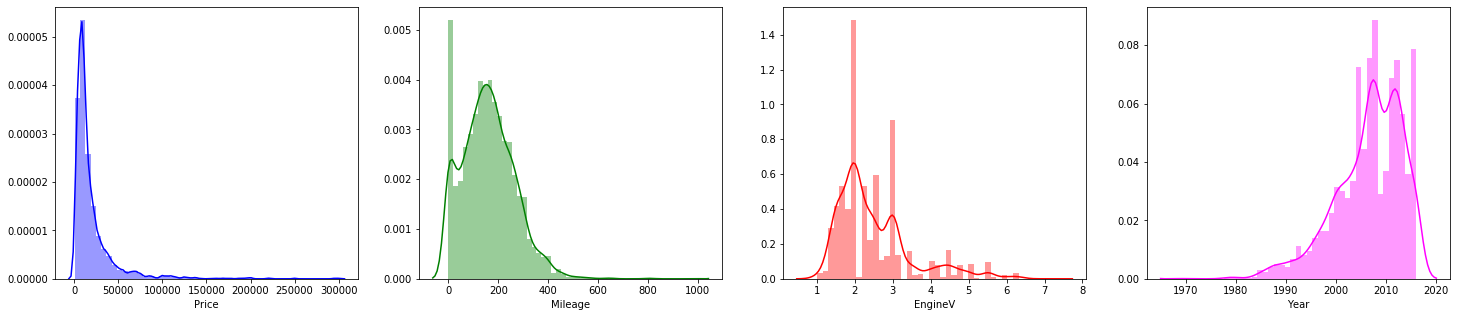

In [9]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize= (25,5))

sns.distplot(data_v002["Price"], ax=ax1, color="blue")
sns.distplot(data_v002["Mileage"], ax=ax2, color="green")
sns.distplot(data_v002["EngineV"], ax=ax3, color="red")
sns.distplot(data_v002["Year"], ax=ax4, color="magenta")
         
plt.show()

<em><b>Observations</b></em>:
    
We can see that <b>Price</b> has a very long tail towards high prices (a strong positive skew). At the same time, we could see in our data summary earlier that we have a few cars with very low prices as well.

For <b>Mileage</b>, we have a high number of zero values, indicating that these cars have never been driven. It is possible that these are the cars that previous "first-hand" dealers have not been able to sell, thus they did not have a previous owner who actually used them. Moreover, only few cars have been driven 500.000 miles or more in their lifetime.

The <b>Engine Volume</b> is positively skewed as well. However, we can now see the effect of removing the flawed entries with unrealistically low or high engine volumes from the data.

Regarding the <b>Year</b>, we can see that the vast majority of cars has a production year after 1985, with only a couple of very old cars that are even older than that.

<em><b>Solutions</b></em>:

There are different ways to tackle outliers in our data, and it appears that different strategies are necessary for each variable. By also focusing on the quetion "What kind of second-hand cars would most potential buyers be interested in?", we will choose the following approaches:

We assume that there are no inherent errors in the values for <b>Price</b> - only a few outliers. We can identify these by using <em>"Interquartile Ranges"</em>, which can be supported visually by <em>Boxplots</em>. We can then choose to remove them or only remove "extreme" outliers, depending on how many we find and how it would impact our dataset. Moreover, we should probably consider that potential buyers are unlikely to buy very cheap (as they might have hidden flaws) or very expensive cars (out of reach and interest for most buyers).

Regarding the <b>Mileage</b>, we can choose a similar approach. We will be using <em>"Interquartile Ranges"</em> and <em>Boxplots</em> here as well. However, it is probably a good idea to take a practical perspective as well. For instance, we can probably assume that not many potantial buyers would be interested in buying a car that has been driven more than 500.000 miles in its lifetime.

Since we removed unrealistic values regarding <b>Engine Volume</b> earlier, there is no reason to remove further cases based on it. Moreover, it can be argued that there are potential buyers for cars of all engine sizes.

Lastly, when looking at the <b>Year</b> variable, one could argue that the vast majority of buyers would not be interested in a car that has been manufactured more than 20 years ago, probably even 10. That said, we should also consider the "reality" of our dataset at hand and not remove too many cases based on the manufacturing year. While looking at both the practical approach and the dataset itself, we can probably find a cut-off point that makes good sense.

Since defining the range of the <b>Year</b> variable is the most arbitrary choice that we make, we will start with this adjustment first. We will then continue to handle outliers in <b>Price</b> and <b>Mileage</b>.

<u><p style="font-size:14px">5.2.2.1. Defining the Range of the <b>Year</b> Variable</p></u>

While it does not seem that there is anything wrong with the data for the manufacturing <b>Year</b> of the cars in the dataset, most potential buyers would probably not want to buy a second-hand car that is more than 20 or even more than 10 years old. At the same time, we would not want to remove too many of our datapoints, so we still have a solid base that represents the existing relationships in the data.

We can have a look at how many cases we would need to remove from the data if we were to only consider cars that are newer than 25 years and below, taking into account that the dataset was created in 2016:

In [10]:
cases_lost_year = []
for i in range(1990,2007): 
    y = data_v002[data_v002.Year < i].Year.count()
    cases_lost_year.append(y)

In [11]:
year_loss = pd.DataFrame()
year_loss["From Year"] = range(1990,2007)
year_loss["Years to Date"] = 2016 - year_loss["From Year"]
year_loss["Cases Lost"] = cases_lost_year
year_loss["Percentage Lost"] = round(year_loss["Cases Lost"] / len(data_v002.index), 2)
year_loss

,From Year,Years to Date,Cases Lost,Percentage Lost
0,1990,26,102,0.02
1,1991,25,120,0.03
2,1992,24,151,0.04
3,1993,23,175,0.04
4,1994,22,202,0.05
5,1995,21,239,0.06
6,1996,20,283,0.07
7,1997,19,346,0.08
8,1998,18,421,0.10
9,1999,17,496,0.12


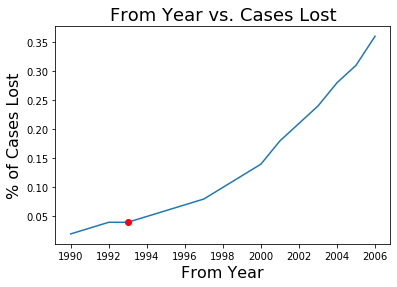

In [12]:
plt.plot(year_loss["From Year"],year_loss["Percentage Lost"])

plt.plot(year_loss["From Year"],year_loss["Percentage Lost"], markevery=range(3,4), ls="", marker="o", c="r")

plt.title("From Year vs. Cases Lost", size=18)
plt.xlabel("From Year", size=16)
plt.ylabel("% of Cases Lost", size=16)

plt.show()

In order to keep as many data points as possible, but also considering that most buyers would not be interested in buying very old cars, we can decide to set our cut-off point at just below 5% of the overall dataset, which corresponds to the manufacturing year of 1993. 

Consequently, we will remove cars that are older than 23 years form the dataset.

In [13]:
data_v003 = data_v002[data_v002["Year"] >= 1993]

<u><p style="font-size:14px">5.2.2.2. Tackling Outliers in the <b>Price</b> and <b>Mileage</b> Variables</p></u>

Contrary to choosing the range of manufacturing years, the identification of outliers for <b>Price</b> and <b>Mileage</b> will be relying on the results of <em>"Box Plots"</em> and <em>"Interquartile Ranges"</em>. We can display the plots first:

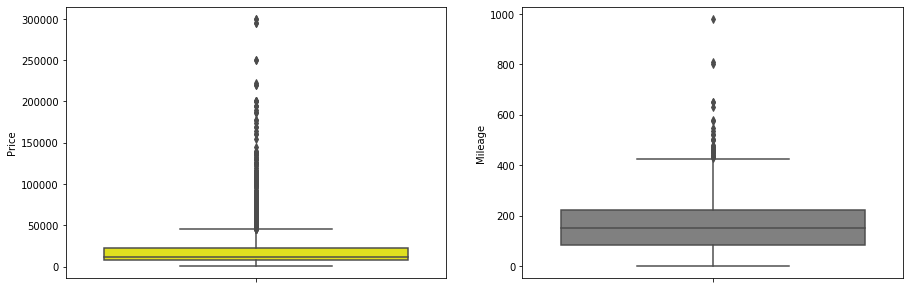

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (15,5))

sns.boxplot(data_v003["Price"], ax=ax1, orient="v", color="yellow")
sns.boxplot(data_v003["Mileage"], ax=ax2, orient="v", color="grey")
     
plt.show()

We can see that there are a number outliers in the <b>Price</b> range of more than 50.000 dollars in the data, whereas the cut-off point for <b>Mileage</b> is a bit above 400.000 miles driven. Let's find the exact numbers:

In [15]:
quartiles = pd.DataFrame()
quartiles["Price"] = data_v003["Price"].describe()
quartiles["Mileage"] = data_v003["Mileage"].describe()
quartiles

,Price,Mileage
count,3829.000000,3996.000000
mean,20355.053045,156.038789
std,26200.195237,100.670293
min,800.000000,0.000000
25%,7500.000000,84.000000
50%,11999.000000,152.000000
75%,22600.000000,220.000000
max,300000.000000,980.000000


We can now calculate the <em>"Interquartile Range"</em> (<b>IQR</b>) as the difference between the third (<b>Q3</b>) and the first (<b>Q1</b>) quartile. At the same time, the lower limit for identifying outliers will be <b>Q1</b> minus 1.5 times <b>IQR</b>, while the upper limit will be <b>Q3</b> plus 1.5 times <b>IQR</b>. We will summarize these results in a table:

In [16]:
q1_price = quartiles.iloc[4][0]
q1_mileage = quartiles.iloc[4][1]

q3_price = quartiles.iloc[6][0]
q3_mileage = quartiles.iloc[6][1]

iqr_price = q3_price - q1_price
iqr_mileage = q3_mileage - q1_mileage

lower_limit_price = q1_price - 1.5 * iqr_price
lower_limit_mileage = q1_mileage - 1.5 * iqr_mileage

upper_limit_price = q3_price + 1.5 * iqr_price
upper_limit_mileage = q3_mileage + 1.5 * iqr_mileage

outlier_limits = pd.DataFrame()
outlier_limits["Price"] = lower_limit_price, upper_limit_price
outlier_limits["Mileage"] = lower_limit_mileage, upper_limit_mileage
outlier_limits.rename(index={0: "Lower Limit", 1: "Upper Limit"}, inplace=True)
outlier_limits

,Price,Mileage
Lower Limit,-15150.0,-120.0
Upper Limit,45250.0,424.0


By using <em>"Interquartile Ranges"</em> we were able to identify the upper and lower limits for both <b>Price</b> and <b>Mileage</b>, for which values above and below these thresholds can be considered suspected outliers. The lower limits for both variables are unattainable as it is not possible for a car to have a negative price or mileage. This signals that zero values are well within the "allowed" range for both variables and we only need to look at cases above the upper limits.

We should now look at the practical side and see how many data points fall above the upper limits:

In [17]:
price_outlier_high = data_v003[data_v003.Price > upper_limit_price].Price.count()
mileage_outlier_high = data_v003[data_v003.Mileage > upper_limit_mileage].Mileage.count()
total_outlier_high = price_outlier_high + mileage_outlier_high

outlier_check = pd.DataFrame([price_outlier_high , mileage_outlier_high, total_outlier_high])
outlier_check.rename(columns={0: "Number of Outliers"}, index={0: "Price", 1: "Mileage", 2: "Total"}, inplace=True)
outlier_check

,Number of Outliers
Price,342
Mileage,34
Total,376


The limit identified for <b>Mileage</b>, produces only a relatively low number of cases, namely 34 cases or less than 1% of the remaining sample (we have 3996 cases remaining in the latest dataset at this point). 

This is an acceptable low number, so we can apply the rule, maybe round up just a bit and delete cases with a mileage of more than 425.000 miles.

At the same time, the cut-off point for <b>Price</b> suggests that a further 376 cases, or almost 10% of the data, should be removed as well. In order to keep as many cases as possible, we can choose to be a bit more "tolerant" regarding the maximum price tag we allow a car in our dataset to have. As a starting point, we can try to gradually increase the constant with which the <b>IRQ</b> for <b>Price</b> is multiplied and then added to <b>Q3</b>. Similar to <b>Year</b>, we can check the impact on the data for different constants, for instance 1.5 to 3.5, in steps of 0.1:

In [18]:
constants = np.arange(1.5,3.6,0.1)

price_cutoff = []
for i in constants: 
    p = q3_price + i * iqr_price
    price_cutoff.append(p)

cases_lost_price = []
for i in constants: 
    lp = data_v003[data_v003.Price > (q3_price + i * iqr_price)].Price.count()
    cases_lost_price.append(lp)

In [19]:
price_loss = pd.DataFrame()
price_loss["Constant"] = constants
price_loss["Price Cut-Off"] = price_cutoff
price_loss["Cases Lost"] = cases_lost_price
price_loss["Percentage Lost"] = round(price_loss["Cases Lost"] / len(data_v003.index), 2)
price_loss

,Constant,Price Cut-Off,Cases Lost,Percentage Lost
0,1.5,45250.0,342,0.09
1,1.6,46760.0,330,0.08
2,1.7,48270.0,307,0.08
3,1.8,49780.0,297,0.07
4,1.9,51290.0,286,0.07
5,2.0,52800.0,267,0.07
6,2.1,54310.0,262,0.07
7,2.2,55820.0,244,0.06
8,2.3,57330.0,234,0.06
9,2.4,58840.0,229,0.06


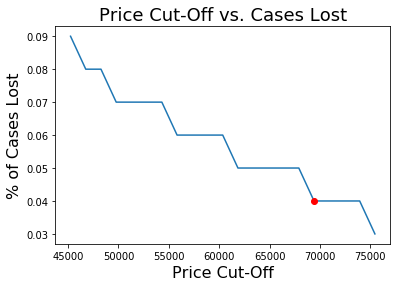

In [20]:
plt.plot(price_loss["Price Cut-Off"],price_loss["Percentage Lost"])

plt.plot(price_loss["Price Cut-Off"],price_loss["Percentage Lost"], markevery=range(16,17), ls="", marker="o", c="r")

plt.title("Price Cut-Off vs. Cases Lost", size=18)
plt.xlabel("Price Cut-Off", size=16)
plt.ylabel("% of Cases Lost", size=16)

plt.show()

Considering again to remove as few cases as possible, we can define the cut-off point just below 5% of the cases of the whole dataset. Rounding up a little again, we decide that the maximum price for a car in our dataset will be 70.000 dollars.

We can now go ahead and remove cars with a <b>Mileage</b> over 425.000 miles, and those with a price tag of over 70.000 dollars as outliers from our dataset:

In [21]:
data_v004 = data_v003[data_v003["Mileage"] <= 425]
data_v004 = data_v004[data_v004["Price"] <= 70000]

Let's have a look at our new dataset:

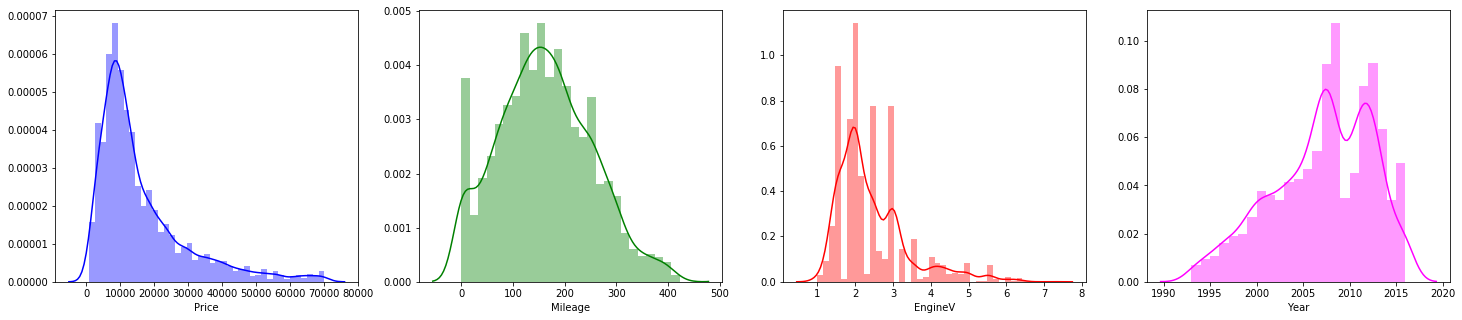

In [22]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize= (25,5))

sns.distplot(data_v004["Price"], ax=ax1, color="blue")
sns.distplot(data_v004["Mileage"], ax=ax2, color="green")
sns.distplot(data_v004["EngineV"], ax=ax3, color="red")
sns.distplot(data_v004["Year"], ax=ax4, color="magenta")
         
plt.show()

In [23]:
data_v004.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3637,3637.000000,3637,3637.000000,3637.000000,3637,3637,3637.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,817,NaN,1362,NaN,NaN,1700,3281,NaN
mean,NaN,16161.489995,NaN,162.043992,2.429260,NaN,NaN,2006.940610
std,NaN,13336.149438,NaN,90.149977,0.943008,NaN,NaN,5.375482
min,NaN,800.000000,NaN,0.000000,1.000000,NaN,NaN,1993.000000
25%,NaN,7450.000000,NaN,97.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,159.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,20500.000000,NaN,223.000000,3.000000,NaN,NaN,2011.000000


We have successfully removed the most extreme outliers in our data and are now looking at distributions that look at lot more "normal", with less extreme skews. At the same time, we have "saved" as many data points as possible in each step and thus retained a solid base of 3637 cases for our analysis.

<u><p style="font-size:18px">5.3. Transforming the <b>Price</b> Variable</p></u>

It is time to revisit the relationships between our dependent variable <b>Price<b/> and our independent variables <b>Mileage</b>, <b>Engine Volume</b> and <b>Year</b>. Let's have a look at the same plots that we looked at before we cleaned our data:

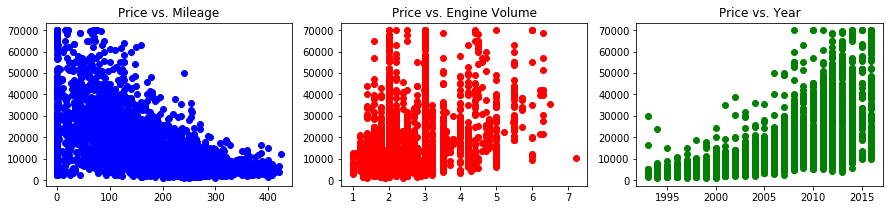

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize= (15,3))

ax1.scatter(data_v004['Mileage'], data_v004['Price'], c="blue")
ax1.set_title('Price vs. Mileage')

ax2.scatter(data_v004['EngineV'], data_v004['Price'], c="red")
ax2.set_title('Price vs. Engine Volume')

ax3.scatter(data_v004['Year'], data_v004['Price'], c="green")
ax3.set_title('Price vs. Year')

plt.show()

Except for <b>Engine Volume</b>, where the relationship is not as pronounced, our variables suggest an exponential relationship with <b>Price</b>, rather than linear one. This is not optimal if we try to describe the regressors' impact using a linear regression model.

To solve this problem, we can apply the natural logarithm to <b>Price</b>, which is expected to turn the relationship into a linear one. We have to keep this transformation in mind when we are interpreting the results of our model later on.

We can apply the transformation of <b>Price</b> by adding the <b>log(Price)</b> as a new variable to our dataset:

In [25]:
data_v004['Log_Price'] = np.log(data_v004["Price"])

Let's look at the relationships again:

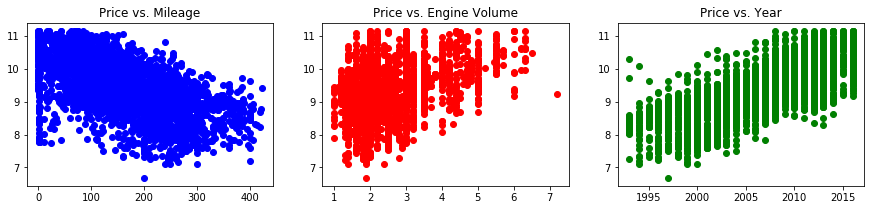

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize= (15,3))

ax1.scatter(data_v004['Mileage'], data_v004['Log_Price'], c="blue")
ax1.set_title('Price vs. Mileage')

ax2.scatter(data_v004['EngineV'], data_v004['Log_Price'], c="red")
ax2.set_title('Price vs. Engine Volume')

ax3.scatter(data_v004['Year'], data_v004['Log_Price'], c="green")
ax3.set_title('Price vs. Year')

plt.show()

The log-transformation has produced more linear relationships, which can be better described by a linear model.

As we are not needing our "old" <b>Price</b> variable anymore, we can drop it from the dataset.

In [27]:
data_v005 = data_v004.drop(["Price"], axis=1)

<u><p style="font-size:18px">5.4. Meeting the Requirements for a Linear Regression</p></u>

Before creating our linear model, we need to make sure that all assumptions for performing a
linear regression are met:

1. <b>No endogeneity</b> -> Meaning no variable in the regression should be correlated with
the regression's error term, or that there should not be a third variable that explains the output, but which the model does not account for. -> This is difficult to check for our model as we can only observe the variables that are given to us in the dataset. However, we should always assume that there are factors influencing our output that we have not been able to measure, or decided to exclude. An example is the <b>Model</b> variable that we decided to drop earlier, or a "damage" variable that tells us whether or not a car had an accident in its lifetime, but which we have no data for. Possible endogeneity should always be considered when interpreting the results of a regression model.<br/><br/>

2. <b>Normality</b> -> Meaning the regression's error term should be normally distributed. -> We can assume this condition to be met due to the <em>Central Limit Theorem</em>, which states that in large samples the distribution of the error term will approximate normality. With more than 3600 observations, we have a large enough sample size for the <em>Central Limit Theorem</em> to apply.<br/><br/>

3. <b>Zero Residual Mean</b> -> Will be accomplished as we will be adding an intercept to the model. This will ensure that the mean of the residuals of the regression line will approximate zero.<br/><br/>

4. <b>Homoscedasticity</b> -> Meaning that the observed values should be equally spread around the regression line (e.g. the spread of observed values does not increase systematically with an increase in price). We have avoided this problem by means of the log-transformation of our <b>Price</b> variable, which has produced linear relationships with our regressors for which we observed an equal spread of overvations around a possible regressions line in our scatter plots.<br/><br/>

5. <b>No autocorrelation</b> -> Meaning none of the data points in our sample is a reproduction of an earlier data point and therefore correlated to it. This problem occurs mostly when looking at panel data or time series. In our case, we merely have a "snapshot" of a situation on the market for used cars in 2016, so there is no reason to assume autocorrelation between the data points in the dataset.<br/><br/>

6. <b>Multicollinearity</b> - Meaning none of the regressors in the model should be correlated with any one or more of the other regressors. We can probably assume that multicollinearity exists in our dataset because, from a logical point of view, <b>Mileage</b> and <b>Year</b> should be correlated in a way that the newer the car, the lower its <b>Mileage</b>.<br/>

We can check for multicollinearity via the use of <em>Variance Inflation Factors (VIFs)</em>. The idea is that a linear regression is run for each of the regressors, whereas one of them always acts as the dependent, and the others as independent variables. We then receive <em>R² values</em> for each regression, which indicate how well each variable can be explained by others. VIF values of 10 or higher have been described as indicating a problematic amount of collinearity, which should be corrected, possibly by dropping the respective variable from the model. 

We can perform VIF analysis with Statsmodels:

<u><p style="font-size:16px">5.4.1. Investigating Multicollinearity via <em>Variance Inflation Factors (VIFs)</em></p></u>

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_v005[["Mileage", "Year", "EngineV"]]

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [29]:
vif

,VIF,Features
0,4.224940,Mileage
1,10.207965,Year
2,7.667343,EngineV


With a VIF value of 1 signalling no multicollinearity at all, values up to 10 (ideally lower) have been considered acceptable. However, as our <b>Year</b> variable surpasses this threshold, we are better advised to not include it in our model. This is due to the fact that its inclusion would artificially increase the explanatory power of our model and, secondly, the VIF analysis has revealed that <b>Mileage</b> and <b>Engine Volume</b> already explain much of the same variation that <b>Year</b> explains.

As a result, we will decide to drop <b>Year</b> from our dataset:

In [30]:
data_v006 = data_v005.drop(["Year"], axis=1)

<u><p style="font-size:18px">5.5. Creating Dummies from Categorical Variables</p></u>

It is now time to create dummies from the categorical variables we have in our dataset. As a quick overview of our dataset reminds us, these variables are <b>Brand</b>, <b>Body Type</b>, <b>Engine Type</b> and <b>Registration</b>:

In [31]:
data_v006.describe(include="all")

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Log_Price
count,3637,3637,3637.000000,3637.000000,3637,3637,3637.000000
unique,7,6,NaN,NaN,4,2,NaN
top,Volkswagen,sedan,NaN,NaN,Diesel,yes,NaN
freq,817,1362,NaN,NaN,1700,3281,NaN
mean,NaN,NaN,162.043992,2.429260,NaN,NaN,9.391792
std,NaN,NaN,90.149977,0.943008,NaN,NaN,0.786548
min,NaN,NaN,0.000000,1.000000,NaN,NaN,6.684612
25%,NaN,NaN,97.000000,1.800000,NaN,NaN,8.915969
50%,NaN,NaN,159.000000,2.200000,NaN,NaN,9.367344
75%,NaN,NaN,223.000000,3.000000,NaN,NaN,9.928180


We can use Panda's practical <em>"Get Dummies"</em> function which will automatically scan our dataset for categorical variables, create dummies from these, and drop the previous categorical variables. <em>"Get Dummies"</em> will always drop the first category of each categorical variable in order to avoid the "Dummy Variable Trap". That is if all other categories are 0, then the first category would necessarily need to be 1, so by adding an extra dummy for the first category, we would introduce multicollinearity as the combination of all the other categories could predict the outcome of the first dummy perfectly.

The dropped category of each variable will be its reference category, meaning the coefficients for each dummy will later on be interpreted with respect to the reference category. Our reference categories are:

For <b>Brand</b> -> Audi<br/>
For <b>Body Type</b> -> Crossover<br/>
For <b>Engine Type</b> -> Diesel<br/>
For <b>Registration</b> -> No (no registration)<br/>

Let's apply <em>"Get Dummies"</em> and have a look at our new dataset:

In [32]:
data_v007 = pd.get_dummies(data_v006, drop_first = True)

In [33]:
data_v007.describe(include="all")

,Mileage,EngineV,Log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
count,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000
mean,162.043992,2.429260,9.391792,0.156998,0.185867,0.080011,0.117404,0.130877,0.224636,0.065988,0.097883,0.374484,0.100357,0.163596,0.146824,0.026120,0.359637,0.902117
std,90.149977,0.943008,0.786548,0.363848,0.389053,0.271348,0.321946,0.337312,0.417400,0.248296,0.297197,0.484056,0.300517,0.369960,0.353979,0.159515,0.479960,0.297197
min,0.000000,1.000000,6.684612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,97.000000,1.800000,8.915969,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,159.000000,2.200000,9.367344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,223.000000,3.000000,9.928180,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,423.000000,7.200000,11.156251,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<u><p style="font-size:16px">5.5.1. Re-examining Multicollinearity with Dummies</p></u>

We have now introduced a range of new dummy variables and at the same time prepared all the regressors that we plan to feed to our model.

We should now re-examine multicollinearity among all regressors to make sure that we have not introduced new relationships between our regressors:

In [34]:
regressors = data_v007.drop("Log_Price", axis=1)

vif_regressors = pd.DataFrame()
vif_regressors["VIF"] = [variance_inflation_factor(regressors.values, i) for i in range(regressors.shape[1])]
vif_regressors["Features"] = regressors.columns
vif_regressors

,VIF,Features
0,4.996497,Mileage
1,8.171754,EngineV
2,2.282814,Brand_BMW
3,2.870286,Brand_Mercedes-Benz
4,1.671119,Brand_Mitsubishi
5,2.149815,Brand_Renault
6,2.216443,Brand_Toyota
7,2.927736,Brand_Volkswagen
8,1.475078,Body_hatch
9,1.554451,Body_other


Even though <b>Engine Volume</b> and <b> Registration_yes</b> are very close to a value of 10, all regressors qualify to be included in our model from a multicollinearity point of view.

<u><p style="font-size:18px">5.6. Standardizing <b>Mileage</b> and <b>Engine Volume</b></p></u>

Usually, dummy variables do not need to be standardized as they are dichotomous and only have 0 and 1 as their possible values.

However, our numeric variables <b>Mileage</b> and <b>Engine Volume</b> are measured on scales with amplitudes that are quite different from each other. Whereas the possible values for <b>Mileage</b> range from 0 to over 400, possible <b>Engine Volumes</b> only range from 1 to slightly over 7.

Adding <b>Mileage</b> and <b>Engine Volume</b> in their current state to our regression would lead the model to assign a much higher importance to <b>Mileage</b>, only because it can take on much higher values.

To solve this problem, we can standardize (or scale) both inputs in order to bring them to a comparable level.

We can use Sklearn's <em>Standard Scaler</em> to scale <b>Mileage</b> and <b>Engine Volume</b>, so they will have a mean of 0 and a standard deviation of 1, bringing their amplitude much closer to those of our dummies, and making both variables and their impacts comparable to each other.

To apply <em>Standard Scaler</em> to our numeric variables, we first need to split them from our regressors:

In [35]:
inputs_numeric = regressors[["Mileage","EngineV"]]
inputs_dummies = regressors.drop(["Mileage","EngineV"], axis=1)

Now we can apply <em>Standard Scaler</em> to our numeric inputs only.

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(inputs_numeric)

inputs_numeric_scaled = pd.DataFrame(scaler.transform(inputs_numeric))
                                     
inputs_numeric_scaled = inputs_numeric_scaled.rename(columns={0: "Mileage_Scaled", 1: "EngineV_Scaled"})

inputs_numeric_scaled

,Mileage_Scaled,EngineV_Scaled
0,2.173966,2.726480
1,0.864856,1.878014
2,-0.466442,-0.455266
3,0.421090,0.287142
4,0.343431,-0.985557
...,...,...
3632,-0.111430,-0.879499
3633,0.010606,0.075025
3634,-1.409445,-0.879499
3635,-1.786646,1.135607


After we have achieved the scaling of our numeric inputs, we need to merge them together with our dummy variables again. We will use the <em>join</em> operator to achieve this goal.

However, <em>Standard Scaler</em> has produced the new dataset "inputs_numeric_scaled" with newly set index parameters, startin from 0 to 3636. Meanwhile, our dataset with dummy variables has retained its original index values, which are not identical to the new values due to the cases we have deleted earlier. This is problematic when trying to join datasets because Pandas will by default try to match index numbers when joining.

In order to successfully join "inputs_numeric_scaled" with our dummies again, we need to reset the index for our "inputs_dummies" as well:

<em>Additional info</em>: The <em>reset_index</em> operator also introduces a column named "index" by default, which we can choose to drop with the addition "drop=True"

In [37]:
inputs_dummies = inputs_dummies.reset_index(drop=True)

inputs_all = inputs_numeric_scaled.join(inputs_dummies)

inputs_all.head()

,Mileage_Scaled,EngineV_Scaled,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,2.173966,2.726480,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
1,0.864856,1.878014,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,-0.466442,-0.455266,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
3,0.421090,0.287142,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,0.343431,-0.985557,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


The result is a new input dataset with scaled variables that can directly be used as an input for our regression.

For the sake of good style, we can create our final dataset, which includes both our dependent and independent variables and signalizes that the data has passed the pre-processing stage. 

Once more, we need to make sure to reset the index of our <b>log(Price)</b> variable before joining the datasets:

In [38]:
log_price = pd.DataFrame(data_v007["Log_Price"].reset_index(drop=True))

data_v1 = log_price.join(inputs_all)

data_v1.head()

,Log_Price,Mileage_Scaled,EngineV_Scaled,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,9.495519,2.173966,2.726480,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
1,10.043249,0.864856,1.878014,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,9.814656,-0.466442,-0.455266,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
3,9.560997,0.421090,0.287142,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,9.287209,0.343431,-0.985557,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


<u><p style="font-size:20px">6. Performing the Regression</p></u>

We have arrived at the point where we have prepared our data sufficiently to perform the linear regression analysis.

However, in order to make sure that we are not overfitting our model on the dataset at hand, we will split our preprocessed dataset into a training and test dataset. The training dataset will be used to fit our model, while the test dataset will be used to objectively test its accuracy.

We will then proceed to fit an initial model to our test dataset and examine whether all of our input variables are providing meaningful contributions to explain our <b>log(Price)</b> variable. Depending on the results, we can then adjust our model by potentially removing unimportant regressors.

We will start by splitting our dataset into train and test data:

<u><p style="font-size:18px">6.1. Splitting the Dataset into Train and Test Data</p></u>

We can apply Sklearn's <em>"train_test_split"</em> method to split our dataset into training and test data. <em>"Train_test_split"</em> provides the advantage that it creates both the input and the target datasets for both train and test data. Moreover, it shuffles the cases in the sets by default, so we can be sure to remove potential effects that may exist due to the order in which cases were saved in the dataset.

A common train-test-split is the 80/20 split, that is 80% of the dataset is chosen as train and 20% as test data. The goal is always to retain the bulk of the data points in the test dataset so we are not losing the underlying patterns in the data due to shrinking our dataset too much. 

We can apply Sklearn's <em>"train_test_split"</em> as follows:

<em>Additional info:</em> We will also set the random shuffle to a specific state (333), so we will attain the same shuffle order each time we run this code again.

In [39]:
targets_raw = data_v1["Log_Price"]
inputs_raw = data_v1.drop("Log_Price", axis=1)

from sklearn.model_selection import train_test_split

inputs_train_initial, inputs_test, targets_train_initial, targets_test = train_test_split(inputs_raw, targets_raw, test_size=0.2, random_state=333) 

We can test if our split has worked correctly:

In [40]:
split_test = pd.DataFrame()
split_test["Dataset"] = ["inputs_train_initial", "inputs_test", "targets_train_initial", "targets_test"]
split_test["Sample Size"] = [len(inputs_train_initial.index), len(inputs_test.index), len(targets_train_initial.index), len(targets_test.index)]
split_test["Sample Percentage"] = split_test["Sample Size"] / len(data_v1.index)
split_test

,Dataset,Sample Size,Sample Percentage
0,inputs_train_initial,2909,0.799835
1,inputs_test,728,0.200165
2,targets_train_initial,2909,0.799835
3,targets_test,728,0.200165


Our split worked indeed, we have roughly achieved an 80/20 split for our train and test data. We can now go ahead and fit our initial model.

<u><p style="font-size:18px">6.2. Fitting the Initial Model</p></u>

We can now fit the initial linear regression with Sklean. A constant will be added automatically to the model. 

In [41]:
from sklearn.linear_model import LinearRegression

reg_initial = LinearRegression()
reg_initial.fit(inputs_train_initial,targets_train_initial)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We can now retrieve the R squared value which displays the proportion of variance in the <b>log(Price)</b> variable explained by our initial model:

In [42]:
r2_initial = reg_initial.score(inputs_train_initial,targets_train_initial)
r2_initial

0.7476727517246993

Moreover, we can calculate the adjusted R squared, which calculates the proportion of variance explained while accounting for the number of factors in our initial model:

In [43]:
inputs_train_initial.shape

(2909, 17)

In [44]:
n_initial=inputs_train_initial.shape[0]

p_initial=inputs_train_initial.shape[1]

adjusted_r2_initial = 1-(1-r2_initial)*(n_initial-1)/(n_initial-p_initial-1)

adjusted_r2_initial

0.746188987206996

The results suggest that our initial model is able to explain almost 75% of the variance of the <b>log(Price)</b>. However, our adjusted R squared is slightly lower than the initial R squared, leading to the suspicion that there might be one or more variables that do not contribute meaningfully to the model.

We can calculate p-values via Sklearn's <em>f-regresssion</em> functionality. It will create simple regressions with each regressor as input and the <b>log(Price)</b> variable as target variable. It will then compare the fit of each regression with an intercept-only model and calculate p-values to indicate whether a given model explains significantly more variance in the target variable compared to the intercept-only model. 

Let's apply <em>f-regresssions</em> to investigate the contribution of each of our regressors:

In [45]:
from sklearn.feature_selection import f_regression

p_values = (f_regression(inputs_train_initial,targets_train_initial)[1]).round(3)
features = inputs_train_initial.columns.values

F_Tests = pd.DataFrame()
F_Tests["Features"] = features
F_Tests["P-Values"] = p_values
F_Tests

,Features,P-Values
0,Mileage_Scaled,0.000
1,EngineV_Scaled,0.000
2,Brand_BMW,0.000
3,Brand_Mercedes-Benz,0.000
4,Brand_Mitsubishi,0.000
5,Brand_Renault,0.000
6,Brand_Toyota,0.000
7,Brand_Volkswagen,0.000
8,Body_hatch,0.000
9,Body_other,0.010


We can see that all variables seem to contribute significantly to our output as their p-values are consistently below 0.05 (meaning there is a less than a 5% chance that a simple regression with each of them produces the same outcome as a constant-only model).

As a result, there is no need to adjust our model any further and we can continue to extract our coefficients and the intercept:

<u><p style="font-size:18px">6.3. Interpreting the Intercept and Coefficients</p></u>

Let's extract the model's intercept:

In [46]:
reg_initial.intercept_

9.046236504078024

We can see that our regression line intersects the y-axis at a value of 9. Moreover, our coefficients can be summarized as follows (ordered by impact):

In [47]:
Model_Overview = pd.DataFrame()
Model_Overview["Features"] = inputs_train_initial.columns.values
Model_Overview["Coefficients"] = reg_initial.coef_
Model_Overview.sort_values(by=['Features'], ascending=False)

,Features,Coefficients
16,Registration_yes,1.104598
0,Mileage_Scaled,-0.403352
1,EngineV_Scaled,0.183097
15,Engine Type_Petrol,-0.263260
14,Engine Type_Other,-0.173042
13,Engine Type_Gas,-0.300220
7,Brand_Volkswagen,-0.236891
6,Brand_Toyota,-0.192949
5,Brand_Renault,-0.599732
4,Brand_Mitsubishi,-0.528186


We can see that <b>Registration_yes</b> has a strong positive effect on the price of a car when compared to cars without a valid license. This makes sense as cars with a valid licence are probably ready to drive, legally allowed to be used on public streets and can be assumed to be in a better condition than cars that do not have a valid license. In a way, a valid licence can tell more about a car than the fact that it is legally allowed to be driven in public. It can be thought of as an indicator for a well-functioning car as well, hence the strong positive impact on the price tag.

<b>Engine Volume</b> has a positive effect as well, indicating that the bigger the engine, the higher the price. This makes sense as well. However, since <b>Engine Volume</b> has been standardized, the magnitude of the effect cannot be interpreted straight forward from this table. The same holds true for <b>Mileage</b>, which, as expected, has a strong negative impact on a car's price tag.

Some further take-aways from this initial table are:

- Audis (reference category for <b>Brand</b>), BMWs and Mercedes tend to have very similar price tags. The table indicates that BMWs tend to be slightly more and Mercedes slightly less expensive than Audis. However, the differences are very small. Mitsubishis and Renaults, on the other hand, tend to be much less expensive than Audis, BMWs and Mercedes, but also significantly less expensive than Volkswagen or Toyotas. At the same time, Toyotas and Volkswagen are rather close together when it comes to their price.


- Compared to a Crossover (reference category for <b>Body Type</b>), any other body type will result in a lower price. This has probably to do with the fact that cars of the type crossover tend to be bigger and more powerful compared to other body types. The body type "Hatch" appears to be the cheapest option.


- Compared to a diesel engine (reference category for <b>Engine Type</b>), any other engine appears to be coming with a lower price tag. Gas appears to be the cheapest option, probably because it is the most unfamiliar form of engine. Petrol engines, on the other hand, could be cheaper because they are less modern and probably perceived as less clean as well.

<u><p style="font-size:18px">6.4. Examining the Predictive Power Visually</p></u>

In order to represent the fit of our model in a more visual way, we can plot the values that are predicted by our model against our actual observed values. That is, we use our regression model to produce predicted targets for our initial training inputs, and plot them against our actual training targets:

<function matplotlib.pyplot.show(*args, **kw)>

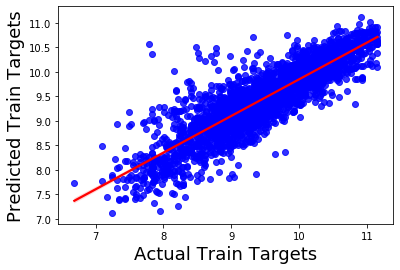

In [48]:
targets_train_predicted = reg_initial.predict(inputs_train_initial)

sns.regplot(x=targets_train_initial, y=targets_train_predicted, scatter_kws = {"color": "blue"}, line_kws = {"color": "red"})

plt.xlabel('Actual Train Targets', size=18)

plt.ylabel('Predicted Train Targets', size=18)

plt.show

We can also examine the distribution of residuals, that is the distribution of the differences between our predicted values and the actualy training targets:

Text(0.5, 1.0, 'Residuals')

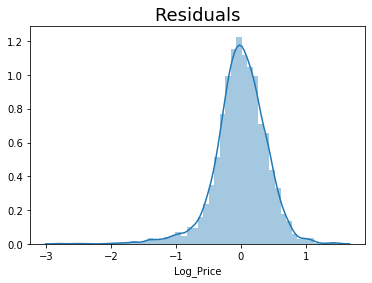

In [49]:
sns.distplot(targets_train_initial - targets_train_predicted)
plt.title("Residuals", size=18)

We can see that we have a normal distribution, with many predicted values being close to the actual, observed values. At the same time, there are tails to both the positive and negative direction that indicate observed values being over- or underestimated.

We can see that we have a slight negative skew, indicating that there are more cases where our model predicted a price that was higher than the actual one. In other words, our model tends to overestimate rather than underestimate the actual car price. This means in practice, that a potential buyer who would use our model to predict the price of her/his new, second-hand dream car would probably find said car at a more favorable price than anticipated, which sounds like good news in general. :)

<u><p style="font-size:20px">7. Testing the Model</p></u>

We have now reached the point where we can test our model against our designated test data. To do this, we will use our model once more to generate predicted tagets, this time for our test inputs, and plot them against our actual test targets:

<function matplotlib.pyplot.show(*args, **kw)>

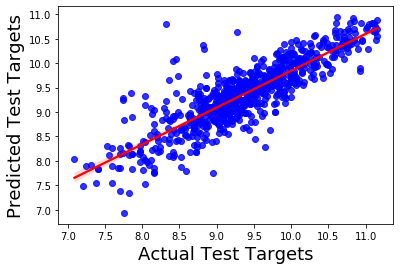

In [50]:
targets_test_predicted = reg_initial.predict(inputs_test)

sns.regplot(x=targets_test, y=targets_test_predicted, scatter_kws = {"color": "blue"}, line_kws = {"color": "red"})

plt.xlabel('Actual Test Targets', size=18)

plt.ylabel('Predicted Test Targets', size=18)

plt.show

We can also check the R squared value which givs us an idea about how well our model fits the test data:

In [51]:
r2_test = reg_initial.score(inputs_test,targets_test)
r2_test

0.7363372818964267

The result shows that our model was able to predict almost 74% of the variance of the <b>log(Price)</b> variable in our test dataset.

It was to expect that the accuracy would be a bit lower compared to the train data as the model itself was trained on it. However, the difference in accuracy is only very small, which indicates that our model would perform almost as well on data "it has never seen" as on our training dataset:

In [52]:
r2_initial - r2_test

0.011335469828272604

This test was an important step to objectively verify our model and ensure that it has not been overfit on the training data.

We can conclude that we have successfully created a linear model which, given new inputs for our regressors, can predict the price of any specified car with an accuracy of ca. 74%.

<u><p style="font-size:20px">8. Predicting the Price for 3 Fictional Cars</p></u>

As a last step of this example, we can check which prices we should expect, according to our model, if we decided to buy one (or all) out of 3 possible (fictional) cars from our second-hand car dealership next door. 

We are going to test 3 cars:

1. The first car will be a BMW hatchback with diesel engine, valid registration, a mileage of 200.000 miles and an engine volume of 2 liters.

2. The second car will be a Mitsubishi sedan with petrol engine, valid registration, a mileage of 100.000 miles and an engine volume of 1.6 liters.

3. The third car will be a Volkswagen van with gas engine, no valid registration, a mileage of 300.000 miles and an engine volume of 3 liters.

We first need to create our cases in a new dataset that we call "Predict_Cars". To get the right column names, we can take the column descriptions from our last dataset before we scaled <b>Mileage</b> and <b>Engine</b>:

In [53]:
columns = data_v007.drop(["Log_Price"], axis=1)
column_names = columns.columns.values

predict_cars = pd.DataFrame([
    [200, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
    [100, 1.6, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1],
    [300, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0]], columns=column_names) 

predict_cars

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,200,2.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,100,1.6,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1
2,300,3.0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0


In order to receive correct outputs, we need to standardize this new dataset in the same way in which we standardized our inputs before. This is because our model will expect the inputs to be of the same magnitude.

We will follow the same steps as before: split the new dataset into numeric and dummy variables, scale the numeric inputs <b>Mileage</b> and <b>Engine Volume</b>, and merge the two input sets together again:

In [54]:
predict_cars_numeric = predict_cars[["Mileage","EngineV"]]

predict_cars_dummies = predict_cars.drop(["Mileage","EngineV"], axis=1)

predict_cars_scaler = StandardScaler()

predict_cars_scaler.fit(predict_cars_numeric)

predict_cars_numeric_scaled = pd.DataFrame(scaler.transform(predict_cars_numeric))
                        
predict_cars_numeric_scaled = predict_cars_numeric_scaled.rename(columns={0: "Mileage", 1: "EngineV"})

predict_cars_dummies = predict_cars_dummies.reset_index(drop=True)

predict_cars_inputs_all = predict_cars_numeric_scaled.join(predict_cars_dummies)

predict_cars_inputs_all

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,0.421090,-0.455266,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,-0.688325,-0.879499,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1
2,1.530505,0.605316,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0


We can now predict the prices for our 3 fictional cars by using our regression model's predict function. We will, however, right away display our exponential <b>(log)Prices</b>, as this transformation will reverse the log-transformation of our prices and ensure that we will be looking at actual prices in our results. Moreover, we will round the results in order to receive a valid amount in dollars and cents:

In [55]:
predict_cars_prices = pd.DataFrame(np.round(np.exp(reg_initial.predict(predict_cars_inputs_all)), 2), columns=["Price Predictions"])
predict_cars_prices.rename(index={0: "Fictional BMW", 1: "Fictional Mitsubishi", 2: "Fictional Volkswagen"}, inplace=True)
predict_cars_prices

,Price Predictions
Fictional BMW,11903.10
Fictional Mitsubishi,9001.78
Fictional Volkswagen,1924.25


According to our model, we would expect our BMW hatchback to appear at a price of ca. 12.000 dollars, our Mitsubishi sedan at a slightly lower price of 9.000 dollars, and our Volkswagen van with gas engine at a "cheap" 2.000 dollars, at our local second-hand car dealer of choice.

Moreover, due to our model's tendency to overestimate prices, we could probably expect those prices to be even lower. Otherwise, we could surely negotiate a better price as well.